In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [140]:
df_train=pd.read_excel('data_Train.xlsx')
df_test=pd.read_excel('data_test.xlsx')
df_train.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [141]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [142]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [143]:
print("Airlines: ",df_train['Airline'].unique())
print("Number of Airlines: ",df_train['Airline'].nunique())


Airlines:  ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Number of Airlines:  12


In [144]:
df_train.dropna(inplace=True)

In [145]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Convert features into each proper data dtype

Let's make som feature engineering to create further features

In [146]:
df_train['Date_of_Journey']=pd.to_datetime(df_train['Date_of_Journey'])
df_train['Day_of_Journey']=(df_train['Date_of_Journey']).dt.day
df_train['Month_of_Journey']=(df_train['Date_of_Journey']).dt.month

In [147]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [148]:
df_train.dtypes
#We steel have Dep_Time and Arrival_Time as Object

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Day_of_Journey               int64
Month_of_Journey             int64
dtype: object

In [149]:
#Dep_time 
df_train['Dep_hr']=pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_min']=pd.to_datetime(df_train['Dep_Time']).dt.minute

In [150]:
#Dep_time 
df_train['Arr_hr']=pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arr_min']=pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [151]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [152]:
#Splitting duration  time

a=df_train['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_train['dur_hr']=a[0].apply(lambda x: x[:-1])
df_train['dur_hr']=df_train['dur_hr'].astype(int)
df_train['dur_min']=a[1].apply(lambda x: x[:-1])
df_train['dur_min']=df_train['dur_min'].astype(int)
df_train['full_duration']=df_train['dur_hr']+(df_train['dur_min']/60)
df_train['full_duration']=df_train['full_duration'].round(2)

In [153]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arr_hr,Arr_min,dur_hr,dur_min,full_duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,2.83
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25,7.42
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0,19.00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25,5.42
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45,4.75


In [154]:
#dropping the data
df_train.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time','dur_min','dur_hr'],inplace=True,axis=1)

In [155]:
#df_train.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time','dur_min','dur_hr'],inplace=True,axis=1)

In [156]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arr_hr,Arr_min,full_duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2.83
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7.42
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19.00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5.42
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4.75


# EDA

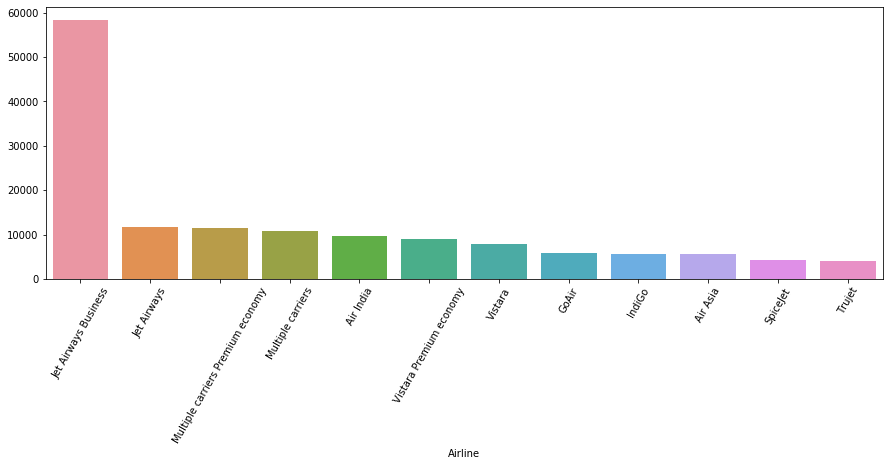

In [157]:
air_price=df_train.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=[15,5])
plt.xticks(rotation=60)
sns.barplot(air_price.index,air_price.values)

In [158]:
p=df_train['Airline'].value_counts()

In [159]:
p

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

([<matplotlib.patches.Wedge at 0x26bbd8d0708>,
 [Text(0.4673382969373547, 0.9957885901212632, 'Jet Airways'),
  Text(-1.0590228682786953, 0.2974400182604306, 'IndiGo'),
  Text(-0.7301424472999118, -0.8227344691034256, 'Air India'),
  Text(0.15445010247657304, -1.0891029179306133, 'Multiple carriers'),
  Text(0.736171915795146, -0.8173438140675592, 'SpiceJet'),
  Text(0.9875298522267969, -0.48454596372369146, 'Vistara'),
  Text(1.0731359530911666, -0.24161793431596462, 'Air Asia'),
  Text(1.0972609559319872, -0.0775783126087553, 'GoAir'),
  Text(1.0999481941968114, -0.010675677176360506, 'Multiple carriers Premium economy'),
  Text(1.0999906759441507, -0.004529109838652445, 'Jet Airways Business'),
  Text(1.0999988107446137, -0.0016175167497391636, 'Vistara Premium economy'),
  Text(1.099999952439457, -0.00032347054347071794, 'Trujet')],
 [Text(0.25491179832946614, 0.5431574127934162, '36.0%'),
  Text(-0.5776488372429247, 0.16224000996023485, '19.2%'),
  Text(-0.39825951670904275, -0.44

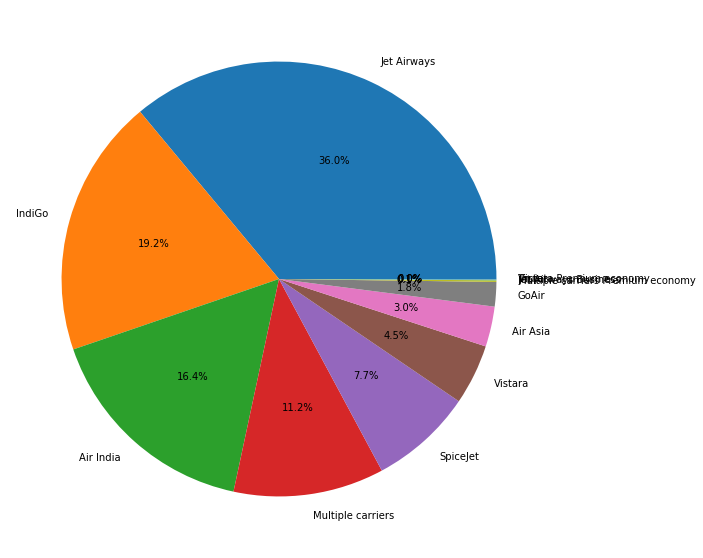

In [160]:
plt.figure(figsize=(10,10))
plt.pie(p.values,labels=p.index,autopct='%1.1f%%')

In [161]:
df_train.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

# Let's Handle Categorical Data

In [162]:
df_train['Total_Stops']=df_train['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
df_train.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arr_hr,Arr_min,full_duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2.83
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7.42
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19.00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5.42
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4.75


In [163]:
df_train['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [164]:
df_train.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops           int64
Additional_Info      object
Price                 int64
Day_of_Journey        int64
Month_of_Journey      int64
Dep_hr                int64
Dep_min               int64
Arr_hr                int64
Arr_min               int64
full_duration       float64
dtype: object

In [165]:
#Airline,Source,Destination,Additional_Info are still Categorical Features --> we are going to use pandas.get_dummies

In [166]:
dumm_airline=pd.get_dummies(df_train['Airline'],drop_first=True)
#df_train.drop(columns='Airline',inplace=True)
#df_train['Airline']=dumm_airline
#df_train.head()
dumm_airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [167]:
dum_src_dest=pd.get_dummies(df_train[['Source','Destination']],drop_first=True)
dum_src_dest

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
10678,0,0,1,0,0,0,0,0,0
10679,0,0,1,0,0,0,0,0,0
10680,0,0,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,0,0,1


In [168]:
df_train=pd.concat([dumm_airline,dum_src_dest,df_train],axis=1)
df_train.drop(columns=['Airline','Source','Destination'],inplace=True)
df_train.dtypes

Air India                              uint8
GoAir                                  uint8
IndiGo                                 uint8
Jet Airways                            uint8
Jet Airways Business                   uint8
Multiple carriers                      uint8
Multiple carriers Premium economy      uint8
SpiceJet                               uint8
Trujet                                 uint8
Vistara                                uint8
Vistara Premium economy                uint8
Source_Chennai                         uint8
Source_Delhi                           uint8
Source_Kolkata                         uint8
Source_Mumbai                          uint8
Destination_Cochin                     uint8
Destination_Delhi                      uint8
Destination_Hyderabad                  uint8
Destination_Kolkata                    uint8
Destination_New Delhi                  uint8
Route                                 object
Total_Stops                            int64
Additional

In [169]:
df_train[['Route','Additional_Info']]

,Route,Additional_Info
0,BLR → DEL,No info
1,CCU → IXR → BBI → BLR,No info
2,DEL → LKO → BOM → COK,No info
3,CCU → NAG → BLR,No info
4,BLR → NAG → DEL,No info
...,...,...
10678,CCU → BLR,No info
10679,CCU → BLR,No info
10680,BLR → DEL,No info
10681,BLR → DEL,No info


In [170]:
df_train.drop(columns=['Route','Additional_Info'],inplace=True)
df_train.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_New Delhi,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arr_hr,Arr_min,full_duration
0,0,0,1,0,0,0,0,0,0,0,...,1,0,3897,24,3,22,20,1,10,2.83
1,1,0,0,0,0,0,0,0,0,0,...,0,2,7662,5,1,5,50,13,15,7.42
2,0,0,0,1,0,0,0,0,0,0,...,0,2,13882,6,9,9,25,4,25,19.00
3,0,0,1,0,0,0,0,0,0,0,...,0,1,6218,5,12,18,5,23,30,5.42
4,0,0,1,0,0,0,0,0,0,0,...,1,1,13302,3,1,16,50,21,35,4.75


Replicate this transformations onto the Test Dataset

In [179]:
X=df_train.drop(columns=['Price'])
y=df_train['Price']

In [183]:
X

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Destination_New Delhi,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arr_hr,Arr_min,full_duration
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,24,3,22,20,1,10,2.83
1,1,0,0,0,0,0,0,0,0,0,...,0,0,2,5,1,5,50,13,15,7.42
2,0,0,0,1,0,0,0,0,0,0,...,0,0,2,6,9,9,25,4,25,19.00
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,5,12,18,5,23,30,5.42
4,0,0,1,0,0,0,0,0,0,0,...,0,1,1,3,1,16,50,21,35,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,9,19,55,22,25,2.50
10679,1,0,0,0,0,0,0,0,0,0,...,0,0,0,27,4,20,45,23,20,2.58
10680,0,0,0,1,0,0,0,0,0,0,...,0,0,0,27,4,8,20,11,20,3.00
10681,0,0,0,0,0,0,0,0,0,1,...,0,1,0,3,1,11,30,14,10,2.67


In [184]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [180]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 22)

In [186]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 28)
(2137, 28)
(8545,)
(2137,)


In [189]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred=rf.predict(X_test)

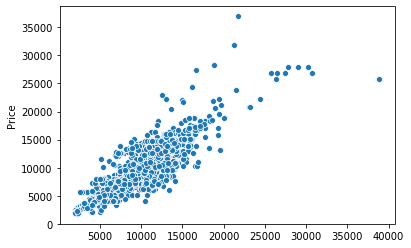

In [195]:
sns.scatterplot(pred,y_test)

0.8106478758771769


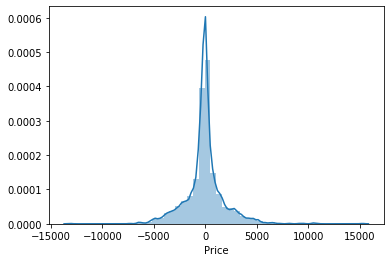

In [194]:
from sklearn.metrics import r2_score
sns.distplot(y_test-pred)
print(r2_score(y_test,pred))

In [197]:
#hypeparametre tuning
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [198]:
rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_rs=RandomForestRegressor()

rv=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=42, n_jobs = -1)


In [200]:
rv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 12, 19, 26, 33, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=42, scoring='neg_mean_squared_error')

0.8304690908668992


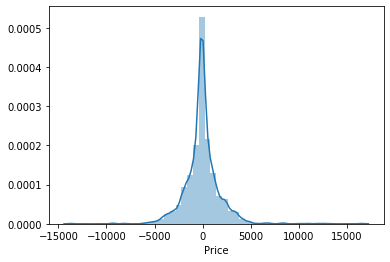

In [202]:
pred=rv.predict(X_test)
sns.distplot(y_test-pred)
print(r2_score(y_test,pred))

In [204]:
import xgboost as xgb
xg=xgb.XGBRegressor()
